# **Information Retrieval in High Dimension Data**
## Assignment - 03
### Group - 4

Group Members: <br>
**Ankith Bheemanakone Venkatagiri :  03694766 <br>
Nikhitha Radhakrishna Naik : 03709543 <br>
Madwaraj Hatwar Kumbashi Raghavendra : 03697531<br>
Anirban Mishra : 03708979<br>
Tuhin Ghosh : 03708837**




# Task 1
On Moodle you will find a Jupyter-Notebook that contains a function for
dimensionality reduction via PCA. The function linear_pca expects a data matrix
X ∈ $R^{p×N}$ and a number of PCs k and returns the first k PCA scores for the matrix
X.

## Part A
Provide code that tests the function with selected images from the provided
MNIST training dataset by visualizing the first 2 scores in a scatter plot.

In [0]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from zipfile import ZipFile
import matplotlib.patches as mpatches

In [0]:
def linear_pca(X, k):
    mu=np.mean(X,axis=1)
    X_c=X-np.expand_dims(mu,axis=1)
    [U,Sigma,VT]=np.linalg.svd(X_c,full_matrices=False)
    S=np.expand_dims(Sigma[:k],axis=1)*VT[:k,:]
    return S

In [10]:
# Insert Code for Subtask 1.1 here

filename = "mnist_train.zip"
zf = ZipFile(filename)

# We need to read each image of size 28 x 28 and form a vector of (784,). Then keep appending for N = 1000 to for X : (784,1000)
# The first 100 will be images for 0, the next 100 for 1, and so on.... So we can use  / 100 to find out which img is for which digit later 

X = np.zeros((784,1000))
subdirs = ['d0','d1','d2','d3','d4','d5','d6','d7','d8','d9']

offset = 0
# Populate X
for cur_dir in subdirs :
  for i in range(1,101):
    filepath = filename+'/mnist/'+cur_dir+"/"+cur_dir+"_"+'%04d.png'%(i)
    X[:,offset+i-1] = np.float64(imageio.imread(filepath).ravel())
  offset += 100  

###################################################################
# This may be faster #
'''
filename = "mnist_train.zip"
filepath = filename+'/mnist/d0/d0_0001.png'
X = np.empty((784,0))

subdirs = ['d0','d1','d2','d3','d4','d5','d6','d7','d8','d9']

for cur_dir in subdirs :
  for i in range(1,101):
    filepath = filename+'/mnist/'+cur_dir+"/"+cur_dir+"_"+'%04d.png'%(i)
    X= np.c_[X,np.array(imageio.imread(filepath).ravel())]
'''
###################################################################

'\nfilename = "mnist_train.zip"\nfilepath = filename+\'/mnist/d0/d0_0001.png\'\nX = np.empty((784,0))\n\nsubdirs = [\'d0\',\'d1\',\'d2\',\'d3\',\'d4\',\'d5\',\'d6\',\'d7\',\'d8\',\'d9\']\n\nfor cur_dir in subdirs :\n  for i in range(1,101):\n    filepath = filename+\'/mnist/\'+cur_dir+"/"+cur_dir+"_"+\'%04d.png\'%(i)\n    X= np.c_[X,np.array(imageio.imread(filepath).ravel())]\n'

In [11]:
# Fetch the first 2 principal components (k=2)
k = 2
S = linear_pca(X, k)
print(S.shape)

(2, 1000)


(10, 4)
(10, 400)
(1000, 4)


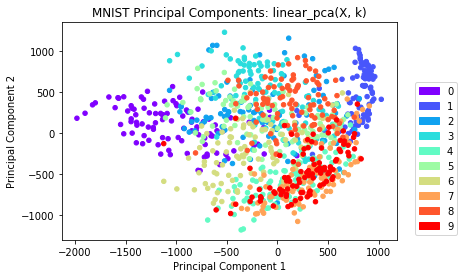

In [12]:
seq = np.arange(10)
ys = [i+seq+(i*seq)**2 for i in range(10)]

# Generate the colors to be used in the plot
colors = cm.rainbow(np.linspace(0, 1, len(ys)))
org_colors = colors
print(colors.shape)
colors = np.tile(colors,(100))
print(colors.shape)
colors = colors.reshape((1000,4))
print(colors.shape)

# Plot the first two Principal Components

plt.scatter(S[0,:], S[1,:], c= colors,s=20)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('MNIST Principal Components: linear_pca(X, k)')
legend_patch = [mpatches.Patch(color=org_colors[i], label=str(i)) for i in range(0, 10)]
plt.legend(handles=legend_patch, bbox_to_anchor=(1.04, 0), loc='lower left', ncol=1)

## Part B
Complete the function gram_pca such that it has the same functionality as
linear_pca but expects a gram matrix K = $X^{T}X$ instead of the data matrix X
as its input. Do not assume that K was produced from centered data. Note: It
is important to be consistent in notation here. E.g., for a data matrix of 1000
MNIST images, we have X ∈ $R^{784×1000}$ and K ∈ $R^{1000×1000}$

In [0]:
def gram_pca(K,k):
    # Insert Code for Subtask 1.2 here

    # Center gram matrix K
    # Dimension of K is number of samples
    N = len(K)  
    # Create an identity matrix of size NxN             
    I = np.eye(N)   
    # Create a NxN matrix with values 1/N            
    H = (1/N)*np.ones((N,N))
    # Create a centered gram matrix 
    Cen_K = (I-H)@K@(I-H)
    
    # SVD of K_centered and principal components
    [V, Sigma2, VT] = np.linalg.svd(Cen_K, full_matrices = False)
    # Take the square root of Sigma
    Sigma = np.sqrt(Sigma2)
    S = np.expand_dims(Sigma[:k], axis = 1) * VT[:k, :]  
    
    return S

In [14]:
K = np.dot(X.T, X)
S = gram_pca(K, 2)
print(S.shape)

(2, 1000)


## Part C
Test your implementation and show that gram_pca(dot($X^T,X$), k) yields results equivalent to those of linear_pca(X, k).

(10, 4)
(10, 400)
(1000, 4)


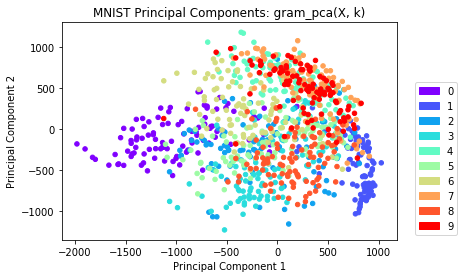

In [15]:
# Insert Code for Subtask 1.3 here
k = 2
#X = np.squeeze(train_set,axis=(2,))
K = np.dot(X.T, X)
S_gram = gram_pca(K, k)
S_linear = linear_pca(X, 2)

# First 2 principal components
PC1 = S_gram[0,:]
PC2 = S_gram[1,:]

# Generate the colors to be used in the plot
colors = cm.rainbow(np.linspace(0, 1, len(ys)))
org_colors = colors
print(colors.shape)
colors = np.tile(colors,(100))
print(colors.shape)
colors = colors.reshape((1000,4))
print(colors.shape)

# Plot the first 2 principal components of data
plt.scatter(PC1, PC2, c = colors, s = 20)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('MNIST Principal Components plot')
plt.title('MNIST Principal Components: gram_pca(X, k)')
legend_patch = [mpatches.Patch(color=org_colors[i], label=str(i)) for i in range(0, 10)]
plt.legend(handles=legend_patch, bbox_to_anchor=(1.04, 0), loc='lower left', ncol=1)

## Part D

Complete the compute_gaussian_gram_matrix function.

In [0]:
def compute_gaussian_gram_matrix(X, sigma):
    #Insert Code for Subtask 1.4 here

    N = np.max(np.shape(X))
    # Create the kernel with zeros
    K =  np.zeros((N,N))
    
    #Looping over the images in the directory
    for i in range(N):
        for j in range(i):
            # Calculating the Gaussian Kernel
            # Get all pairwise differences in data
            pairwise_difference = X[:,i] - X[:,j]
            # Take the squared norm of the pairwise difference and place it in the kernel
            K[i, j] = np.exp(-np.sum((pairwise_difference**2))/(2*(sigma**2)))
            K[j, i] = K[i, j]
    return K

def gaussian_kernel_pca(X, k, sigma):
    K=compute_gaussian_gram_matrix(X,sigma)
    S=gram_pca(K,k)
    return S


## Part E


Test gaussian_kernel_pca with some MNIST train images and $\mathbf{\sigma}$ = 1000.

(10, 4)
(10, 400)
(1000, 4)


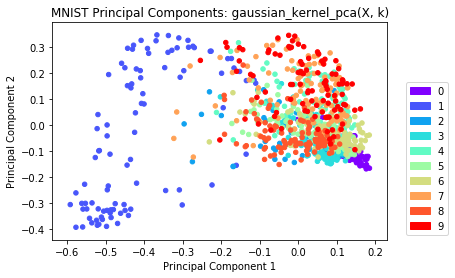

In [19]:
#Insert Code for Subtask 1.5 here
k = 2
sigma = 1000
S_gauss = gaussian_kernel_pca(X, k, sigma)

# First 2 principal components
PC1 = S_gauss[0,:]
PC2 = S_gauss[1,:]

# Generate the colors to be used in the plot
colors = cm.rainbow(np.linspace(0, 1, len(ys)))
org_colors = colors
print(colors.shape)
colors = np.tile(colors,(100))
print(colors.shape)
colors = colors.reshape((1000,4))
print(colors.shape)

# Plot the first 2 principal components of data
plt.scatter(PC1, PC2, c = colors, s = 20)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('MNIST Principal Components plot')
plt.title('MNIST Principal Components: gaussian_kernel_pca(X, k)')
legend_patch = [mpatches.Patch(color=org_colors[i], label=str(i)) for i in range(0, 10)]
plt.legend(handles=legend_patch, bbox_to_anchor=(1.04, 0), loc='lower left', ncol=1)